## Module 4.1: Inception Layers

We will see how to create inception layers for use in advanced convolutional neural networks.

We will:
- Implement a function to create the basic and standard inception blocks.
- Create basic models and visually examine the inception architecture.

Since we are looking at *layers* rather than networks, we will not solve a problem in this module. However it is a good exercise for you to try on your own to make use of these inception layers to improve the CNN performance from module 2.2.

We import required libraries.

In [0]:
from keras.models import Model
from keras.layers import Input,Conv2D,Flatten,Dense
from keras.layers import MaxPooling2D
from keras.layers.merge import concatenate
from keras.utils import plot_model

Using TensorFlow backend.


We make a wrapper function to create a basic inception block. We allow the caller to specify the number of 1x1, 3x3 and 5x5 filters to use - you could allow the caller much more freedom to specify the internal layers.

In [0]:
# Creating a basic inception block
def basic_inception_module(layer_in, f1, f3, f5):
	# 1x1 Convolution
	conv1 = Conv2D(f1, (1,1), padding='same', activation='relu')(layer_in)
	# 3x3 Convolution
	conv3 = Conv2D(f3, (3,3), padding='same', activation='relu')(layer_in)
	# 5x5 Convolution
	conv5 = Conv2D(f5, (5,5), padding='same', activation='relu')(layer_in)
	# 3x3 Max Pooling
	pool = MaxPooling2D((3,3), strides=(1,1), padding='same')(layer_in)
	# Concatenate
	layer_out = concatenate([conv1, conv3, conv5, pool], axis=-1)
	return layer_out

Let's create a model that consists of two basic inception blocks. Then we can get its summary and graph its architecture. Notice that now we have parallel layers the linear summary is less clear that the graphical representation.





Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 128, 128, 32) 128         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 128, 128, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 128, 128, 32) 2432        input_1[0][0]                    
________________________________________________________________________________________

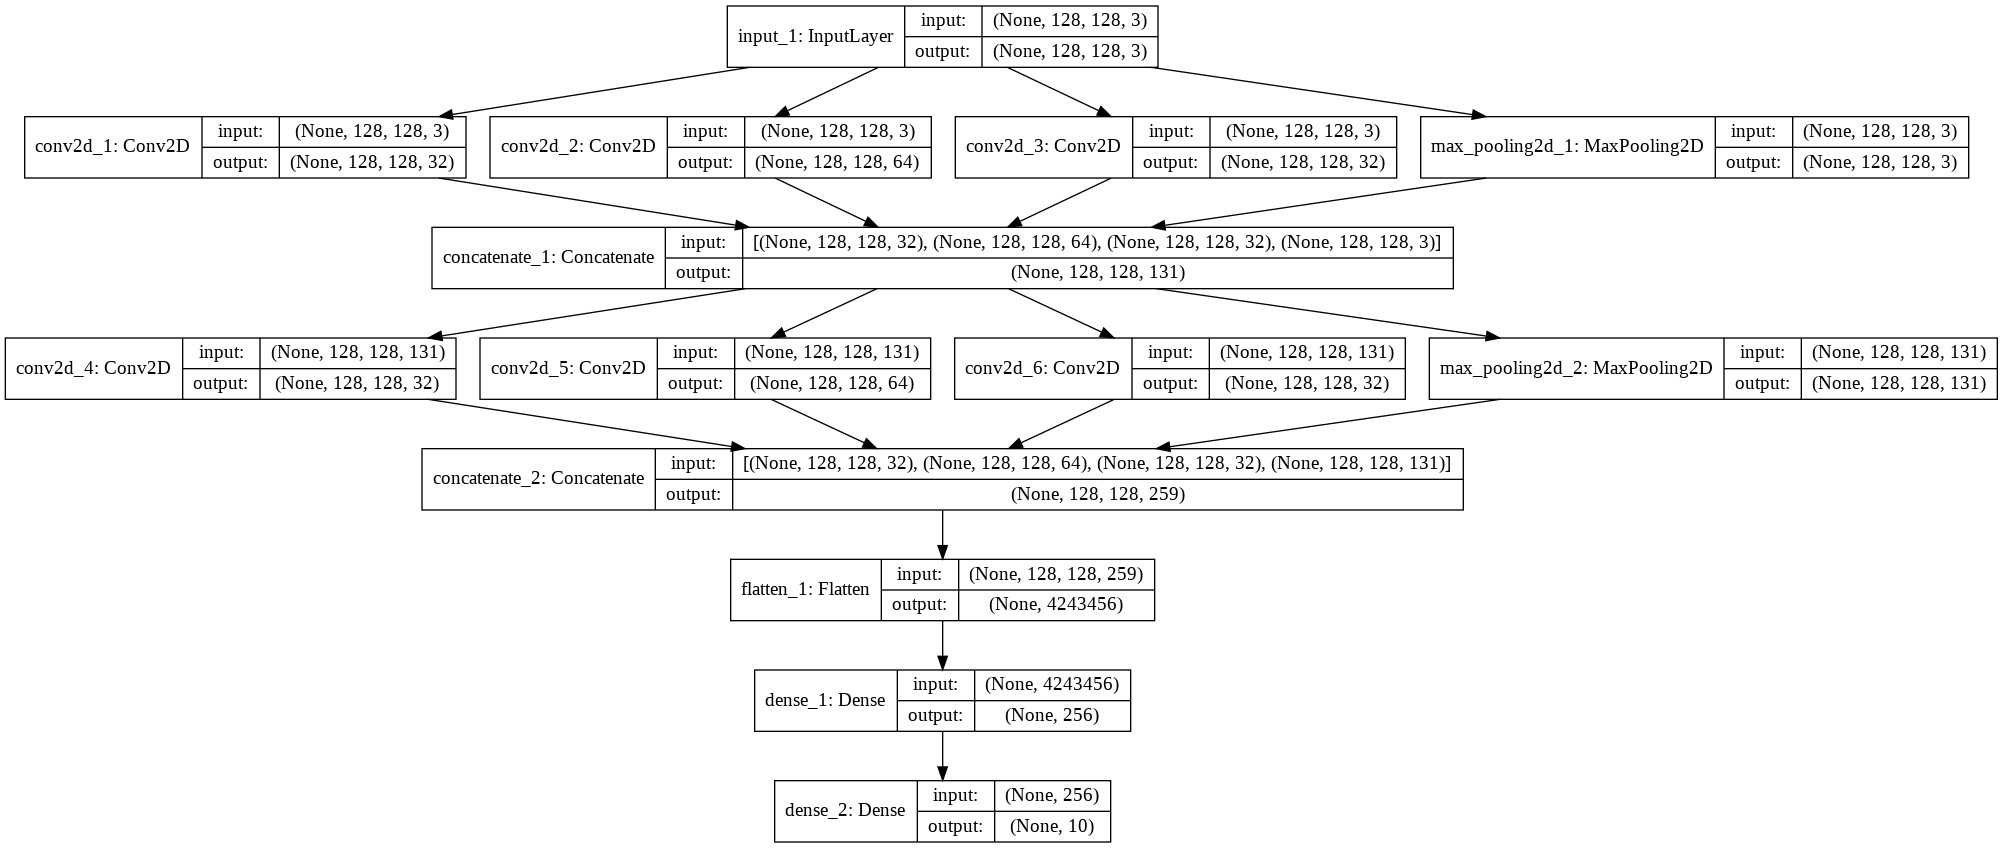

In [0]:
# Define input
inputs1 = Input(shape=(128, 128, 3))
# Add two inception blocks
iblock1 = basic_inception_module(inputs1, 32, 64, 32)
iblock2 = basic_inception_module(iblock1, 32, 64, 32)
# Flatten for output
flat = Flatten()(iblock2)
dense1 = Dense(256, activation='relu')(flat)
outputs = Dense(10, activation='softmax')(dense1)
# Create model
model1 = Model(inputs=inputs1, outputs=outputs)
# Summarize model
model1.summary()
# Plot model graph
plot_model(model1, show_shapes=True, to_file='naive_inception_module.png')

We make a wrapper function to create a standard inception block. We allow the caller to specify the number of 1x1, 3x3 and 5x5 filters to use, as well as the number of 1x1 filters to place before the 3x3 and 5x5 filter layers and after the max pooling layer. Again, you could allow the caller much more freedom to specify the internal layers.

In [0]:
# Create inception module
def inception_module(layer_in, f1, f3_in, f3_out, f5_in, f5_out, mp_out):
	# 1x1 Convolution
	conv1 = Conv2D(f1, (1,1), padding='same', activation='relu')(layer_in)
	# 3x3 Convolution
	conv3 = Conv2D(f3_in, (1,1), padding='same', activation='relu')(layer_in)
	conv3 = Conv2D(f3_out, (3,3), padding='same', activation='relu')(conv3)
	# 5x5 Convolution
	conv5 = Conv2D(f5_in, (1,1), padding='same', activation='relu')(layer_in)
	conv5 = Conv2D(f5_out, (5,5), padding='same', activation='relu')(conv5)
	# 3x3 Max Pooling
	pool = MaxPooling2D((3,3), strides=(1,1), padding='same')(layer_in)
	pool = Conv2D(mp_out, (1,1), padding='same', activation='relu')(pool)
	# Concatenate
	layer_out = concatenate([conv1, conv3, conv5, pool], axis=-1)
	return layer_out

Let's create a model that consists of two basic inception blocks to look at its summary and graph its architecture.

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
conv2d_8 (Conv2D)               (None, 128, 128, 64) 256         input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_10 (Conv2D)              (None, 128, 128, 16) 64          input_2[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_3 (MaxPooling2D)  (None, 128, 128, 3)  0           input_2[0][0]                    
____________________________________________________________________________________________

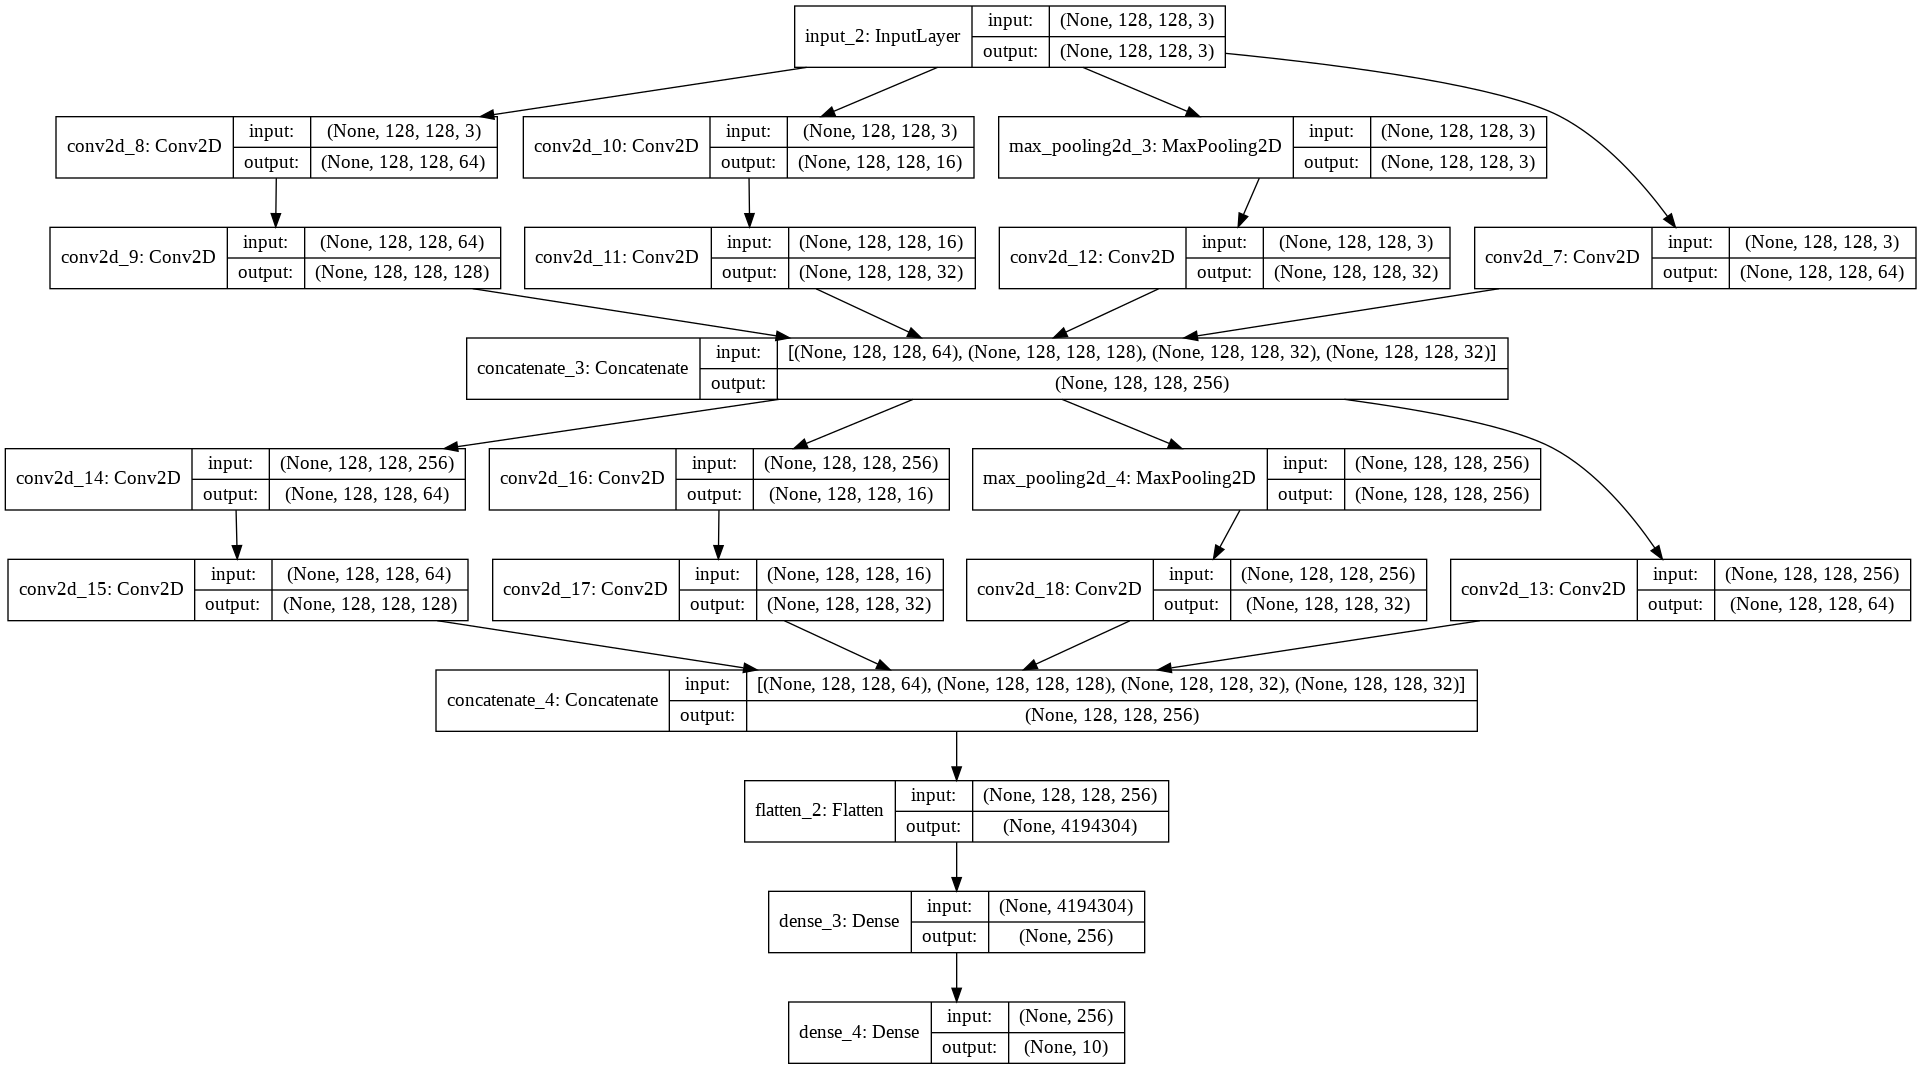

In [0]:
# Define input
inputs1 = Input(shape=(128, 128, 3))
# Add two inception blocks
iblock1 = inception_module(inputs1, 64, 64, 128, 16, 32, 32)
iblock2 = inception_module(iblock1, 64, 64, 128, 16, 32, 32)
# Flatten for output
flat = Flatten()(iblock2)
dense1 = Dense(256, activation='relu')(flat)
outputs = Dense(10, activation='softmax')(dense1)
# Create model
model2 = Model(inputs=inputs1, outputs=outputs)
# Summarize model
model2.summary()
# Plot model graph
plot_model(model2, show_shapes=True, to_file='inception_module.png')